# DS-SF-27 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [69]:
import os
import pandas as pd


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
import statsmodels.api as sm
import numpy as np

import seaborn as sns



Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [5]:
df.shape[0]

400

Answer: 400 observations

> ### Question 2.  Create a summary table.

In [7]:
df.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [14]:
df.gre.var(),df.gpa.var()

(13369.953039758006, 0.14487948622204228)

Answer: because the spread of GRE scores (220;800) is much larger than the spread of GPA scores (1;4)

> ### Question 4.  Drop data points with missing data.

In [32]:
df=df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [33]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: The quartiles are now numbers, which they were not before dropping the incorrect data

> ### Question 6.  Create boxplots for `gre` and `gpa`.

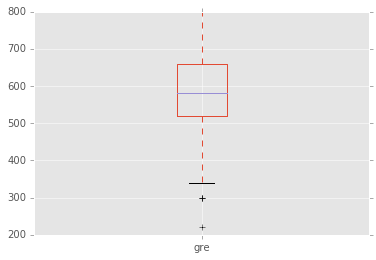

In [49]:
df.gre.plot(kind= 'box')

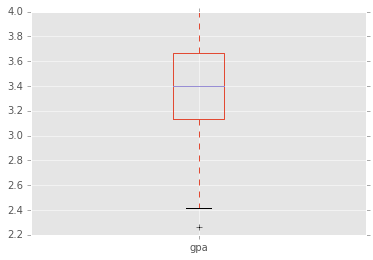

In [50]:
df.gpa.plot(kind= 'box')

> ### Question 7.  What do boxplots show?

Answer: We have two outliers below the lower whisker for the GRE and one outlier below the lower whisker for the GPA

> ### Question 8.  Plot the distribution of each variable.

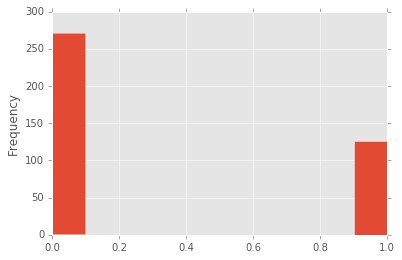

In [53]:
df.admit.plot(kind='hist')

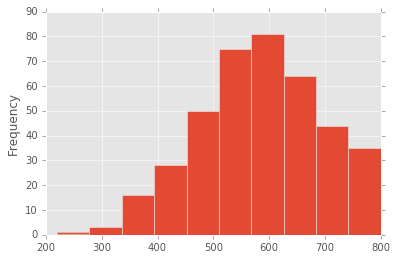

In [54]:
df.gre.plot(kind='hist')

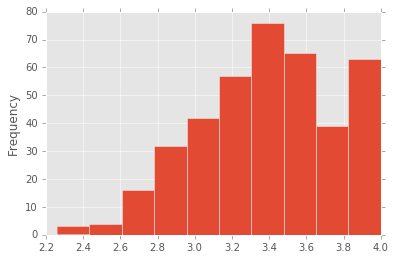

In [55]:
df.gpa.plot(kind='hist')

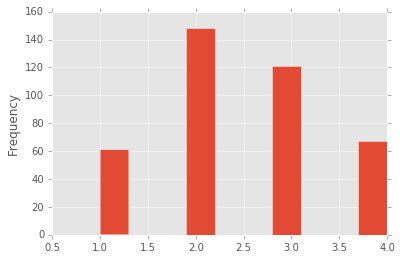

In [56]:
df.prestige.plot(kind='hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [92]:
mu, sigma = 0, 5
s=np.random.normal(mu, sigma, 1000)

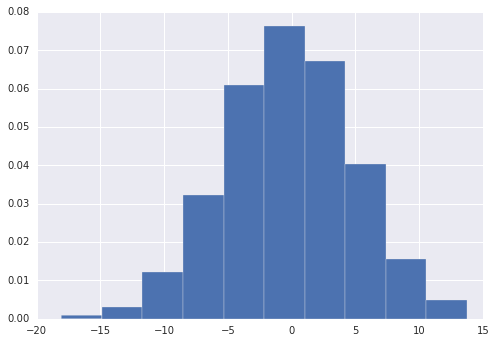

In [93]:
count, bins, ignored = plt.hist(s, 10, normed=True)

Answer: The GRE and GPA don't currently follow a normal distribution. 
The GRE distribution looks symetrical but it is missing a right tail because the GRE system max out the score to 800.
The GPA distribution doesn't look symetrical, it looks bi-modal as the GPA has an upper limit of 4.0 so all the best students end up with the same scores eventhough they would end up with different scores if the scale didn't have an upper limit.

> ### Question 10.  Create a correlation matrix for the dataset

In [59]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: We don't find any strong correlation between the admission status and any of the other variables. The GRE and GPA scores might be potentially colinear as they have a correlation score of 0.38 but is still pretty low for colinearity as one can see below.

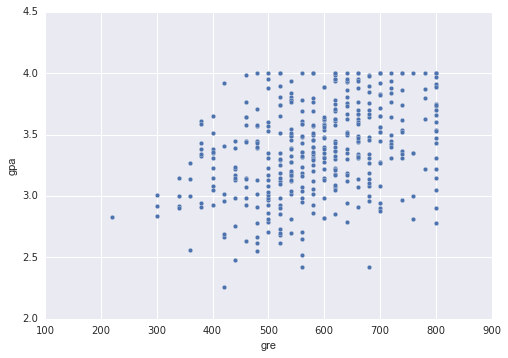

In [81]:
df.plot(kind = 'scatter', x='gre',y='gpa')

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Exploratiry analysis plan: 1- Find out if any variables follow a specific distribution (watch out for outliers) 2- Check for outliers with the IQR and discard them 3- Check for colinearity by computing the covariance between each grad school admission rates and prestige of undergrad schools.

> ### Question 13.  What is your hypothesis?

Answer: Graduate school admission rates aren't corrolated to prestige of undergraduate schools